In [ ]:
from IPython.core.display import Image, display
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats


# Collect them all!

So my daughter is collecting animal cards from her favourite Yo-yo Bear snacks. They're pretty cool and look like this:


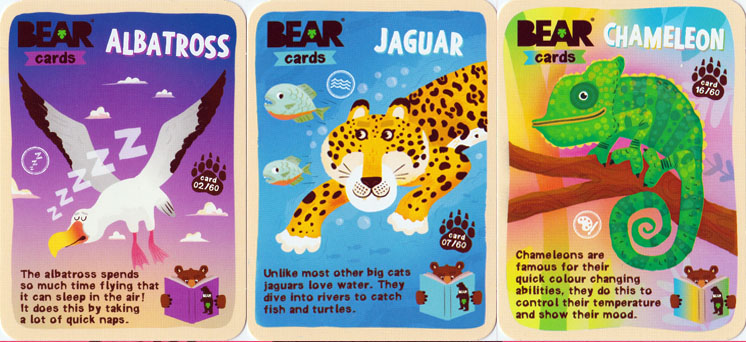

In [ ]:
display(Image('http://www.yoyobearcards.co.uk/Images/animalsindex.jpg', width=700, unconfined=True))

There's 40 unique cards in total. Right now she's got 39 and, as these things go, many doubles. So I thought it might be fun to model this and see how many cards you'd be likely to need before you complete the set. 

Let's start by saying all cards have equal probability. This is controversial as the girls tell me some are super rare. I have no idea how they're collecting data on this but don't fancy arguing the point. 


First up, let's model one kid's collection. We'll make a function which does the following. 
- Makes a collection of 40 cards. We'll make an list of 40 zeros, and as we collect each card we'll change the zero to a one. 
- We'll choose an random card each time and increase our counter by one. 
- This loop will repeat whilst there are zeros present. Once we've got them all we'll stop the function and return the counter

In [ ]:
def single_collection(show_turns):
    no_cards = 0
    collection = [0] * 40
    while 0 in collection: #stops the loop when all places occupied by a zero
        no_cards += 1 #increase number of cards each turn
        choice = random.randint(1,40) #choose a random number between 1 and 40
        collection[choice-1]=1 #assigns the card number as taken
        if show_turns == True: #If I've turned on logging this will print every move
            print(collection)
    return no_cards 

Have to be a bit careful here, as our index lookup starts at 0, but we're asking randint to return a number between 1 and 40. Hence why I've said 'choice-1'.
Let's see how many cards our first kid needs to get. 

In [ ]:
print(single_collection(show_turns=False))

209


Ouch, that's a big number. Let's run that again but this time show all of our turns with (show_turns=True)

In [ ]:
print(single_collection(show_turns=True))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0

We don't really need to see each turn, but I find it quite satisfying to see the slots fill up. And there's no weird behaviour at positions 0 or 39.

OK, simulation time. Our simulation will be a list of 100,000 runs. We'll append these to the variable run each time. 
This is probably going to take ages, so every time len run is divisible by 10,000 we'll print its length. Just so we know our computer is doing something.

In [ ]:
sim_count = [0] * 100000
run = []
for i in sim_count:
    run.append(single_collection(show_turns=False))
    if (len(run) %10000) ==0:
        print(len(run))
print(run)
    

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
[156, 216, 130, 350, 136, 193, 200, 224, 134, 158, 137, 184, 127, 143, 187, 166, 196, 154, 191, 125, 168, 136, 193, 175, 199, 138, 153, 246, 207, 191, 224, 184, 108, 130, 137, 132, 136, 156, 235, 166, 323, 165, 152, 139, 165, 112, 141, 161, 184, 152, 241, 195, 101, 103, 285, 159, 154, 194, 232, 124, 205, 189, 206, 136, 143, 168, 190, 127, 146, 117, 153, 154, 154, 156, 186, 120, 181, 188, 173, 146, 192, 176, 110, 324, 191, 142, 197, 167, 149, 224, 216, 108, 194, 284, 139, 154, 162, 194, 154, 162, 165, 135, 98, 158, 164, 284, 135, 139, 162, 157, 264, 262, 95, 160, 147, 196, 150, 203, 270, 144, 260, 158, 145, 233, 164, 146, 154, 241, 170, 139, 170, 112, 136, 148, 149, 189, 142, 187, 137, 141, 211, 188, 160, 241, 109, 193, 135, 159, 156, 167, 188, 282, 186, 142, 285, 245, 170, 255, 119, 183, 151, 229, 145, 195, 163, 444, 156, 159, 230, 161, 106, 134, 195, 251, 154, 135, 151, 278, 121, 128, 99, 209, 159, 164, 180, 214, 193, 168, 3

In [ ]:
print ('The mean number of cards is',np.mean(run))
print ('The lowest number of cards is',np.min(run))
print ('The highest number of cards is',np.max(run))

The mean number of cards is 171.19843
The lowest number of cards is 65
The highest number of cards is 588


So the mean number of cards is 170, but you have to feel sorry for that kid who had 631 doubles before she completed the set. 

Let's plot a histogram to understand this better. 

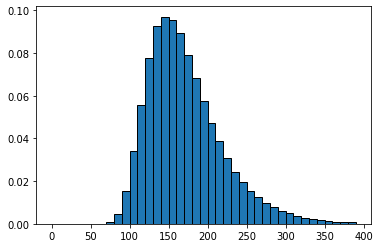

In [ ]:
bins = np.arange(0,400,10)

hist, edges = np.histogram(run, bins)
freq = hist/float(hist.sum())

plt.bar(bins[:-1],freq,width=10, align="edge", ec="k" )

plt.show()

It's quite an asymmetric distribution with a long tail. Our unluckiest child doesn't even fit on this plot. 

So the moral of the story is without swapsies, you're not going to complete this by yourself. 


Which brings us to today. My daughter has exactly one card left to get. Do we think she'll complete the set tonight?

How best to represent this? Let's make a list where all cards are marked as '1' and randomly take one out.
Then we'll proceed as before.

In [ ]:
def one_left():
    no_cards = 0
    collection = [1] * 40
    missing_card = random.randint(1,40)
    collection[missing_card-1] = 0
    while 0 in collection: #stops the loop when all places occupied by a zero
        no_cards += 1 #increase number of cards each turn
        choice = random.randint(1,40) #choose a random number between 1 and 40
        collection[choice-1]=1 #assigns the card number as taken
    return no_cards 

In [ ]:
sim_count = [0] * 100000
run = []
for i in sim_count:
    run.append(one_left())
    if (len(run) %10000) ==0:
        print(len(run))
print(run)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
[115, 1, 20, 134, 117, 14, 2, 11, 12, 60, 38, 155, 31, 13, 20, 75, 73, 38, 65, 23, 35, 15, 35, 97, 53, 9, 42, 62, 43, 16, 38, 21, 8, 5, 43, 29, 28, 25, 19, 32, 64, 116, 60, 98, 78, 3, 44, 4, 35, 54, 20, 42, 45, 17, 7, 17, 150, 54, 19, 102, 17, 73, 29, 81, 59, 93, 16, 16, 52, 88, 4, 2, 17, 3, 23, 9, 237, 13, 58, 4, 127, 90, 63, 63, 10, 87, 6, 23, 79, 5, 23, 102, 53, 112, 38, 31, 25, 10, 102, 138, 14, 68, 10, 1, 26, 8, 14, 33, 29, 76, 18, 36, 24, 56, 76, 31, 98, 8, 11, 14, 1, 6, 17, 27, 5, 65, 16, 35, 60, 24, 59, 165, 2, 100, 3, 30, 17, 20, 6, 36, 66, 27, 93, 82, 17, 10, 19, 43, 120, 2, 91, 72, 22, 9, 68, 154, 133, 32, 10, 1, 34, 40, 19, 24, 44, 20, 5, 90, 5, 2, 26, 11, 173, 17, 51, 113, 159, 14, 39, 15, 15, 10, 5, 92, 14, 142, 56, 12, 35, 102, 11, 33, 63, 32, 17, 2, 8, 1, 12, 24, 6, 142, 6, 45, 62, 6, 23, 11, 34, 6, 42, 36, 99, 15, 14, 40, 75, 25, 3, 18, 17, 19, 28, 40, 5, 44, 39, 25, 54, 72, 23, 11, 36, 26, 79, 13, 8, 12, 16,

In [ ]:
print ('The mean number of cards is',np.mean(run))
print ('The mode number of cards is',stats.mode(run))
print ('The median number of cards is',np.median(run))
print ('The lowest number of cards is',np.min(run))
print ('The highest number of cards is',np.max(run))


The mean number of cards is 40.04342
The mode number of cards is ModeResult(mode=array([1]), count=array([2489]))
The median number of cards is 28.0
The lowest number of cards is 1
The highest number of cards is 486


I'm including the mode here because it's quite instructive. In 2.5% of cases the card comes up first time, but again this has a very long tail. 

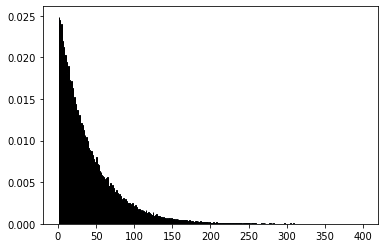

In [ ]:
bins = np.arange(0,400,1)
hist, edges = np.histogram(run, bins)
freq = hist/float(hist.sum())
plt.bar(bins[:-1],freq,width=1, align="edge", ec="k" )
plt.show()